In [3]:
import json
import os

file_path =  r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Filtered_Quarterly_data.json"
# Load JSON file
with open(file_path, "r") as file:
    data = json.load(file)

# Print the top-level keys
print(data.keys())

# Check the structure inside "Quarterly"
print(data["Quarterly"].keys())


dict_keys(['Quarterly'])
dict_keys(['Quarters', 'Net sales/income from operations', 'Total income from operations', 'Employees cost', 'depreciat', 'Other expenses', 'P/l before other inc. , int., excpt. items & tax', 'Other income', 'P/l before int., excpt. items & tax', 'Interest', 'P/l before exceptional items & tax', 'Exceptional items', 'Tax', 'Net profit/(loss) for the period'])


In [39]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd

# Load JSON file
file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Filtered_Quarterly_data.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Define base path for saving graphs
plot_base_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Plot"

# Create "Line Graph" folder if it doesn't exist
line_graph_folder = os.path.join(plot_base_path, "Line Graph")
os.makedirs(line_graph_folder, exist_ok=True)

# Extract company names and categories
company_name_list = data["Quarterly"]["Quarters"].keys()
categories = [key for key in data["Quarterly"].keys() if key != "Quarters"]  # Exclude "Quarters" key

# Loop through each category and company to generate and save plots
for category in categories:
    # **Replace invalid characters (`/` and `\`) with `_` for folder creation**
    safe_category_name = category.replace("/", "_").replace("\\", "_")
    
    # Create a subfolder for each sanitized category inside "Line Graph"
    category_folder = os.path.join(line_graph_folder, safe_category_name)
    os.makedirs(category_folder, exist_ok=True)

    for company_name in company_name_list:
        try:
            # Extract data
            years = data["Quarterly"]["Quarters"][company_name][f"Quarterly Results of {company_name[:-4]}(in Rs. Cr.)"]["Year"]
            quarters = data["Quarterly"]["Quarters"][company_name][f"Quarterly Results of {company_name[:-4]}(in Rs. Cr.)"]["Quarter"]
            net_profit = data["Quarterly"][category][company_name]

            # Create DataFrame
            df = pd.DataFrame({
                "Year": pd.to_numeric(years),
                "Quarter": quarters,
                "Net Profit": net_profit
            })

            # Convert Year & Quarter to proper DateTime for sorting
            df["Time"] = pd.to_datetime(df["Year"].astype(str) + df["Quarter"].str.replace("Q", "-"), format="%Y-%m")
            df.sort_values("Time", inplace=True)

            # Plot the graph
            plt.figure(figsize=(12, 5))
            plt.plot(df["Time"], df["Net Profit"], marker="o", linestyle="-", label=f"{company_name} - {category}")
            plt.xticks(rotation=45)
            plt.xlabel("Time")
            plt.ylabel("Net Profit (Rs. Cr.)")
            plt.title(f"Net Profit Over Time for {company_name} - {category}")
            plt.legend()
            plt.grid()

            # **Sanitize file name** to prevent issues
            safe_file_name = f"{company_name}{safe_category_name}_LGQ.png".replace("/", "_").replace("\\", "_")
            file_path = os.path.join(category_folder, safe_file_name)

            # Save the plot
            plt.savefig(file_path, bbox_inches="tight")
            plt.close()  # Close the figure to free memory
        
        except KeyError as e:
            print(f"Skipping {company_name} in {category} due to missing key: {e}")


In [44]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load JSON file
file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Filtered_Quarterly_data.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Define base path for saving histograms
plot_base_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Plot"

# Create "Histogram" folder if it doesn't exist
histogram_folder = os.path.join(plot_base_path, "Histogram_20")
os.makedirs(histogram_folder, exist_ok=True)

# Extract company names and categories
company_name_list = data["Quarterly"]["Quarters"].keys()
categories = [key for key in data["Quarterly"].keys() if key != "Quarters"]  # Exclude "Quarters" key

# Loop through each category and company to generate and save histograms
for category in categories:
    # **Replace invalid characters (`/` and `\`) with `_` for folder creation**
    safe_category_name = category.replace("/", "_").replace("\\", "_")
    
    # Create a subfolder for each sanitized category inside "Histogram"
    category_folder = os.path.join(histogram_folder, safe_category_name)
    os.makedirs(category_folder, exist_ok=True)

    for company_name in company_name_list:
        try:
            # Extract data
            years = data["Quarterly"]["Quarters"][company_name][f"Quarterly Results of {company_name[:-4]}(in Rs. Cr.)"]["Year"]
            quarters = data["Quarterly"]["Quarters"][company_name][f"Quarterly Results of {company_name[:-4]}(in Rs. Cr.)"]["Quarter"]
            net_profit = data["Quarterly"][category][company_name]

            # Create DataFrame
            df = pd.DataFrame({
                "Year": years,
                "Quarter": quarters,
                "Net Profit": net_profit
            })

            # Convert year and quarter into a single time index
            df["Time"] = df["Year"] + "-" + df["Quarter"]
            df.sort_values("Time", inplace=True)

            # Plot the histogram
            plt.figure(figsize=(10, 5))
            sns.histplot(df["Net Profit"], bins=20, kde=True, color="blue")
            plt.xlabel("Net Profit (Rs. Cr.)")
            plt.ylabel("Frequency")
            plt.title(f"Histogram of Net Profit for {company_name} - {category}")
            plt.grid()

            # **Sanitize file name** to prevent issues
            safe_file_name = f"{company_name}{safe_category_name}_HIST.png".replace("/", "_").replace("\\", "_")
            file_path = os.path.join(category_folder, safe_file_name)

            # Save the plot
            plt.savefig(file_path, bbox_inches="tight")
            plt.close()  # Close the figure to free memory
        
        except KeyError as e:
            print(f"Skipping {company_name} in {category} due to missing key: {e}")


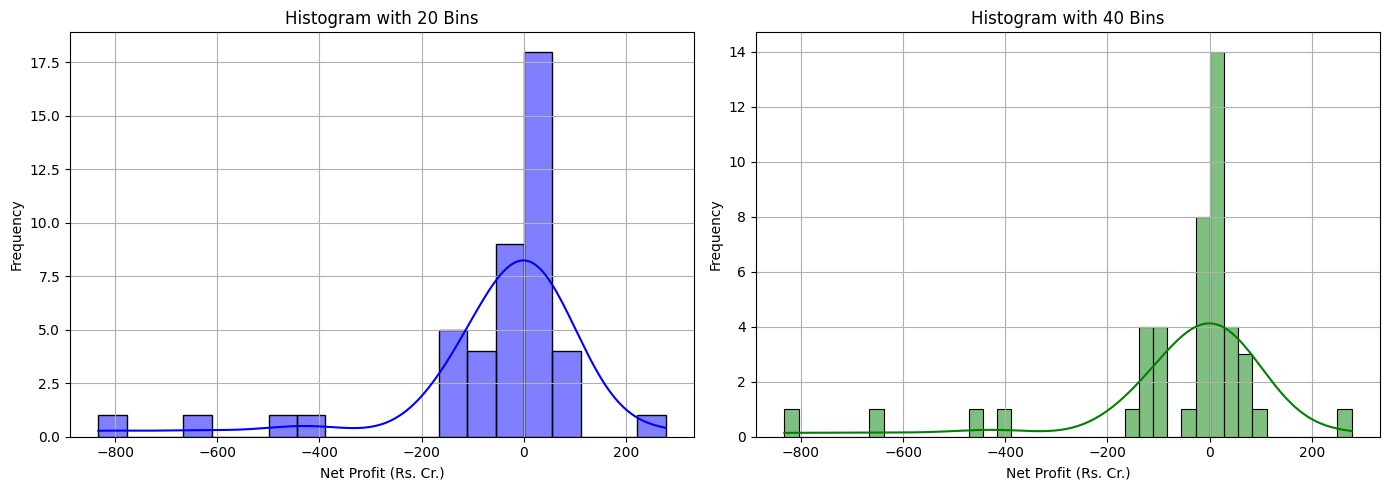

In [42]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load JSON file
file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Filtered_Quarterly_data.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Extract required data
years = data["Quarterly"]["Quarters"]["3i Infotech Ltd"]["Quarterly Results of 3i Infotech(in Rs. Cr.)"]["Year"]
quarters = data["Quarterly"]["Quarters"]["3i Infotech Ltd"]["Quarterly Results of 3i Infotech(in Rs. Cr.)"]["Quarter"]
net_profit = data["Quarterly"]["Net profit/(loss) for the period"]["3i Infotech Ltd"]

# Create a DataFrame
df = pd.DataFrame({
    "Year": years,
    "Quarter": quarters,
    "Net Profit": net_profit
})

# Convert year and quarter into a single time index
df["Time"] = df["Year"] + "-" + df["Quarter"]
df.sort_values("Time", inplace=True)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with bins=20
sns.histplot(df["Net Profit"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Histogram with 20 Bins")
axes[0].set_xlabel("Net Profit (Rs. Cr.)")
axes[0].set_ylabel("Frequency")
axes[0].grid()

# Histogram with bins=40
sns.histplot(df["Net Profit"], bins=40, kde=True, color="green", ax=axes[1])
axes[1].set_title("Histogram with 40 Bins")
axes[1].set_xlabel("Net Profit (Rs. Cr.)")
axes[1].set_ylabel("Frequency")
axes[1].grid()

# Show the plots
plt.tight_layout()
plt.show()


In [8]:
import json

# Load JSON file
file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Filtered_Quarterly_data.json"

with open(file_path, "r") as file:
    data = json.load(file)

# Extract company names and categories (excluding "Quarters")
company_name_list = list(data["Quarterly"]["Quarters"].keys())
categories = [key for key in data["Quarterly"].keys() if key != "Quarters"]

# Dynamically find total year count (from any company in "Quarters")
sample_company = company_name_list[0]  # Pick the first company
year_list = data["Quarterly"]["Quarters"][sample_company][f"Quarterly Results of {sample_company[:-4]}(in Rs. Cr.)"]["Year"]
TOTAL_YEARS = len(year_list)  # Total number of years dynamically calculated

# Store results separately
below_30 = []
between_30_and_80 = []
above_80 = []

# Iterate through categories and companies
for category in categories:
    for company_name in company_name_list:
        try:
            # Get the company's data for the current category
            values = data["Quarterly"][category][company_name]

            # Count zero values
            zero_count = values.count(0)

            if zero_count > 0:
                # Calculate percentage of zero values
                zero_percentage = (zero_count / TOTAL_YEARS) * 100

                # Check conditions
                if 1 < zero_percentage < 30:
                    below_30.append((category, company_name, zero_count, zero_percentage))
                elif 30 < zero_percentage < 80:
                    between_30_and_80.append((category, company_name, zero_count, zero_percentage))
                elif zero_percentage > 80:
                    above_80.append((category, company_name, zero_count, zero_percentage))

        except KeyError:
            continue  # Skip missing data

if below_30:
    print("### Parameters with Zero Percentage Below 30%  ###\n")
    for param, company, count, percent in below_30:
        print(f"Parameter: {param}")
        print(f"Company: {company}")
        print(f"Zero Count: {count}")
        print(f"Percentage of Zero Values: {percent:.2f}%\n")
        
# Print results for 30% < zero percentage < 80%
if between_30_and_80:
    print("### Parameters with Zero Percentage Between 30% and 80% ###\n")
    for param, company, count, percent in between_30_and_80:
        print(f"Parameter: {param}")
        print(f"Company: {company}")
        print(f"Zero Count: {count}")
        print(f"Percentage of Zero Values: {percent:.2f}%\n")

# Print a blank line
print("\n")

# Print results for zero percentage > 80%
if above_80:
    print("### Parameters with More Than 80% Zero Count ###\n")
    for param, company, count, percent in above_80:
        print(f"Parameter: {param}")
        print(f"Company: {company}")
        print(f"Zero Count: {count}")
        print(f"Percentage of Zero Values: {percent:.2f}%\n")


### Parameters with Zero Percentage Below 30%  ###

Parameter: Net sales/income from operations
Company: Adroit Infotech Ltd
Zero Count: 2
Percentage of Zero Values: 4.44%

Parameter: Net sales/income from operations
Company: Avance Technologies Ltd
Zero Count: 6
Percentage of Zero Values: 13.33%

Parameter: Net sales/income from operations
Company: Cranes Software International Ltd
Zero Count: 11
Percentage of Zero Values: 24.44%

Parameter: Net sales/income from operations
Company: Megasoft Ltd
Zero Count: 9
Percentage of Zero Values: 20.00%

Parameter: Net sales/income from operations
Company: Titan Intech Ltd
Zero Count: 8
Percentage of Zero Values: 17.78%

Parameter: Net sales/income from operations
Company: Xtglobal Infotech Ltd
Zero Count: 4
Percentage of Zero Values: 8.89%

Parameter: Total income from operations
Company: Adroit Infotech Ltd
Zero Count: 1
Percentage of Zero Values: 2.22%

Parameter: Total income from operations
Company: Avance Technologies Ltd
Zero Count: 4
Per

In [4]:
import json
import numpy as np

# Load JSON files
filtered_quarterly_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Updated_Filtered_Quarterly_data.json"
clustered_companies_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Clustered_Companies_Around_Targets.json"

with open(filtered_quarterly_path, "r") as file:
    filtered_data = json.load(file)

with open(clustered_companies_path, "r") as file:
    clustered_data = json.load(file)

# Process each target company
for target_company, cluster_companies in clustered_data.items():
    try:
        target_values = filtered_data["Quarterly"]["Other income"][target_company]
    except KeyError:
        print(f"Skipping {target_company}: No Net Profit data found.")
        continue
    
    # Iterate through each index in the Net Profit list
    for i in range(len(target_values)):
        if target_values[i] == 0:  # Only process if the value is zero
            cluster_values = []
            
            for company in cluster_companies:
                try:
                    cluster_company_values = filtered_data["Quarterly"]["Net profit/(loss) for the period"][company]
                    if i < len(cluster_company_values):
                        cluster_values.append(cluster_company_values[i])
                except KeyError:
                    continue  # Skip companies with missing data
            
            # Compute mean if valid cluster values are available
            if cluster_values:
                mean_value = np.mean(cluster_values)
                target_values[i] = round(mean_value, 2)  # Replace with mean value
    
    # Update the data back
    filtered_data["Quarterly"]["Net profit/(loss) for the period"][target_company] = target_values

# Save the updated JSON file
updated_filtered_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Updated_Filtered_Quarterly_data.json"
with open(updated_filtered_path, "w") as file:
    json.dump(filtered_data, file, indent=4)

print(f"Updated data saved to {updated_filtered_path}")


Updated data saved to C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Updated_Filtered_Quarterly_data.json
